In [1]:
#========================================================================================
#                                    AlexNet 
#========================================================================================

In [2]:
# AlexNet is an epoch-making neural network model that won the 2012 ILSVRC by more than 10% of the correct answers to second place.
# Since the advent of AlexNet, image classification with neural networks has become the defacto standard.

In [3]:
# PyTorch Version is 0.4.1.
# torchvision Version is 0.2.1

# pip install torch==0.4.1
# pip install torchvision==0.2.1

In [4]:
import numpy as np
import json
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
from torchvision import models, transforms

In [5]:
# Using a trained AlexNet model
AlexNet = models.alexnet(pretrained=True)
AlexNet.eval()

# Structure of the AlexNet model
print(AlexNet)

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p=0.5)
    (4): Linear(in_features=4096, out_feature

In [6]:
# Image preprocessing
class BaseTransform():
    
    def __init__(self, resize, mean, std):
        self.base_transform = transforms.Compose([transforms.Resize(resize),
                                                  transforms.CenterCrop(resize),
                                                  transforms.ToTensor(),
                                                  transforms.Normalize(mean, std)])
    
    def __call__(self, img):
        return self.base_transform(img)

In [7]:
# Post-processing to predict the label
class ILSVRCPredictor():
    
    def __init__(self, class_index):
        self.class_index = class_index
        
    def predict_max(self, out):
        maxid = np.argmax(out.detach().numpy())
        predicted_label_name = self.class_index[str(maxid)][1]
        
        return predicted_label_name

In [8]:
# Function to perform image prediction
def ImageClassification(image_file_path, ILSVRC_index):
    
    resize = 224
    mean = (0.485, 0.456, 0.406)
    std = (0.229, 0.224, 0.225)
    
    predictor = ILSVRCPredictor(ILSVRC_index)
    
    # Loading and viewing images
    img = Image.open(image_file_path)
    plt.imshow(img)
    plt.show
    
    # Image preprocessing
    transform = BaseTransform(resize, mean, std)
    img_transformed = transform(img)
    inputs = img_transformed.unsqueeze_(0)
    
    # Enter an image into the model and convert it to a label
    out = AlexNet(inputs)
    result = predictor.predict_max(out)
    
    # Output labels
    print("Predicted result : ", result)

In [9]:
# Reading label data
ILSVRC_index = json.load(open('./SourceData/ILSVRC_index.json'))

# View Labels
#ILSVRC_index

Predicted result :  accordion


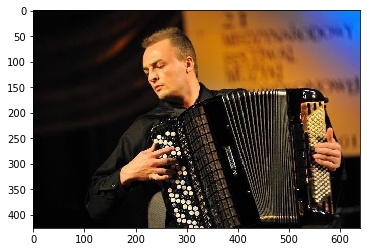

In [10]:
# Specify the image
image_file_path = './SourceData/Accordion.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  Christmas_stocking


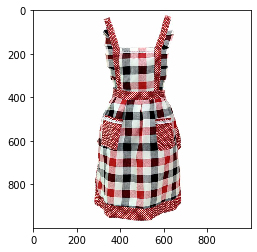

In [11]:
# Specify the image
image_file_path = './SourceData/Apron.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  sturgeon


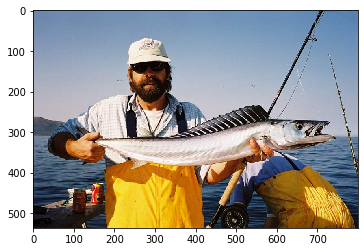

In [12]:
# Specify the image
image_file_path = './SourceData/Barracouta.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  grocery_store


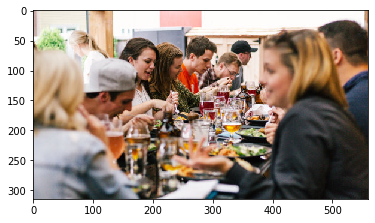

In [13]:
# Specify the image
image_file_path = './SourceData/Cafeteria.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  castle


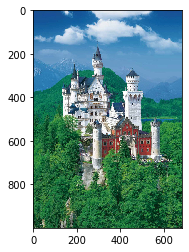

In [14]:
# Specify the image
image_file_path = './SourceData/Castle.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  cello


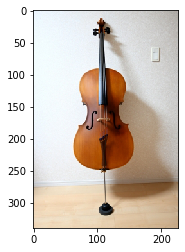

In [15]:
# Specify the image
image_file_path = './SourceData/Cello.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  theater_curtain


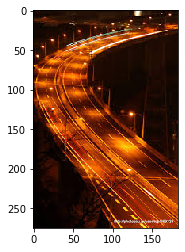

In [16]:
# Specify the image
image_file_path = './SourceData/Highway.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  sea_lion


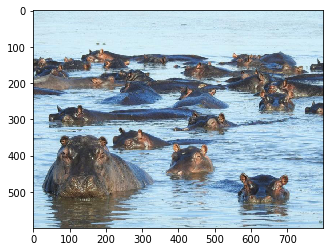

In [17]:
# Specify the image
image_file_path = './SourceData/Hippo.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  warplane


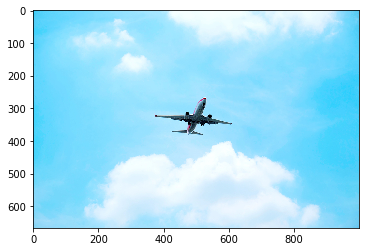

In [18]:
# Specify the image
image_file_path = './SourceData/JumboJet.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

Predicted result :  scuba_diver


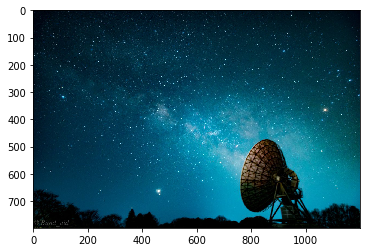

In [19]:
# Specify the image
image_file_path = './SourceData/RadioTelescope.jpg'

# Classify images
ImageClassification(image_file_path, ILSVRC_index)

In [20]:
# Please try other images as well.